In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [22]:
csv_file = 'data/US_Accidents_FL.csv'

traffic_accidents_raw = pd.read_csv(csv_file) # leemos el dataset


### 🔍 Análisis Exploratorio (EDA)

In [23]:
traffic_accidents_raw.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-116062,Source2,3,2016-11-30 15:36:03,2016-11-30 17:09:22,27.981367,-82.326561,NaN,NaN,0.01,Queueing traffic and two left lane blocked due to accident on I-75 Southbound after Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,E Dr Martin Luther King Jr Blvd,Tampa,Hillsborough,FL,33610,US,US/Eastern,KVDF,2016-11-30 15:35:00,80.6,NaN,70.0,29.94,10.0,SSW,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-116063,Source2,3,2016-11-30 16:25:35,2016-11-30 17:12:25,27.981367,-82.326561,NaN,NaN,0.01,Queueing traffic and 2 left lane closed due to accident on I-75 Southbound at Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,E Dr Martin Luther King Jr Blvd,Tampa,Hillsborough,FL,33610,US,US/Eastern,KVDF,2016-11-30 16:35:00,80.6,NaN,65.0,29.94,10.0,WSW,6.9,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.01,Accident on FL-992 152nd St at Lincoln Blvd.,SW 152nd St,Miami,Miami-Dade,FL,33157-1147,US,US/Eastern,KTMB,2016-11-30 16:53:00,80.1,NaN,71.0,29.96,10.0,SE,9.2,NaN,Mostly Cloudy,False,False,True,False,False,False,False,False,False,True,False,True,False,Day,Day,Day,Day


In [24]:
traffic_accidents_raw.shape

(880192, 46)

In [25]:
traffic_accidents_raw.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [26]:
# Identificamos si hay valores nulos en el dataset
traffic_accidents_raw.isnull().sum()
missing_values = traffic_accidents_raw.isnull().sum()

missing_values

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  282640
End_Lng                  282640
Distance(mi)                  0
Description                   0
Street                     1251
City                         33
County                        0
State                         0
Zipcode                     765
Country                       0
Timezone                    766
Airport_Code               1007
Weather_Timestamp          5458
Temperature(F)            13828
Wind_Chill(F)            189358
Humidity(%)               15483
Pressure(in)               7546
Visibility(mi)            11407
Wind_Direction            12418
Wind_Speed(mph)           33559
Precipitation(in)        167669
Weather_Condition          9900
Amenity                       0
Bump                          0
Crossing

In [27]:
number_columns = traffic_accidents_raw.select_dtypes(include = np.number).columns.to_list()
number_columns

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [28]:
categorical_columns = traffic_accidents_raw.select_dtypes(include = "object").columns.to_list()
categorical_columns

['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [36]:
# Tratamiento de valores nulos: rellenar con valores apropiados

# Para columnas numéricas, rellenamos con la mediana
for col in number_columns:
    median_value = traffic_accidents_raw[col].median()
    traffic_accidents_raw[col] = traffic_accidents_raw[col].fillna(median_value)

# Para columnas categóricas, rellenamos con la moda
for col in categorical_columns:
    mode_value = traffic_accidents_raw[col].mode()[0]
    traffic_accidents_raw[col] = traffic_accidents_raw[col].fillna(mode_value)

In [42]:
print("\nInformación general del dataset:")
traffic_accidents_raw.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880192 entries, 0 to 880191
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     880192 non-null  object 
 1   Source                 880192 non-null  object 
 2   Severity               880192 non-null  int64  
 3   Start_Time             880192 non-null  object 
 4   End_Time               880192 non-null  object 
 5   Start_Lat              880192 non-null  float64
 6   Start_Lng              880192 non-null  float64
 7   End_Lat                880192 non-null  float64
 8   End_Lng                880192 non-null  float64
 9   Distance(mi)           880192 non-null  float64
 10  Description            880192 non-null  object 
 11  Street                 880192 non-null  object 
 12  City                   880192 non-null  object 
 13  County                 880192 non-null  object 
 14  St

In [43]:
traffic_accidents_raw.describe(include='all')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,880192,880192,880192.00000,880192,880192,880192.000000,880192.000000,880192.000000,880192.000000,880192.000000,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192.000000,880192.000000,880192.000000,880192.000000,880192.000000,880192,880192.000000,880192.000000,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192
unique,880192,3,NaN,662141,759762,NaN,NaN,NaN,NaN,NaN,383068,49146,586,73,1,88638,1,2,90,174907,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,62,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-7777411,Source1,NaN,2021-01-26 16:16:13,2020-12-22 03:52:52,NaN,NaN,NaN,NaN,NaN,Accident,I-95 S,Miami,Miami-Dade,FL,33186,US,US/Eastern,KORL,2021-01-26 15:53:00,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,597552,NaN,225,21,NaN,NaN,NaN,NaN,NaN,1155,36920,186801,251601,880192,9140,880192,846262,83487,5968,NaN,NaN,NaN,NaN,NaN,98274,NaN,NaN,326149,872213,879885,689368,878809,841380,877220,876043,880122,823482,864788,878891,723052,880192,642263,679288,715813,745131
mean,NaN,NaN,2.14006,NaN,NaN,27.532921,-81.483055,27.405083,-81.378552,0.531761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.399692,75.632514,71.370715,30.015948,9.518549,NaN,8.463678,0.007810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.40794,NaN,NaN,1.558923,1.441479,1.291090,1.195203,1.674585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.378613,9.617904,17.116111,0.163218,1.681169,NaN,5.036558,0.062646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00000,NaN,NaN,24.554800,-87.555076,24.566013,-87.618730,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.000000,-80.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.00000,NaN,NaN,25.927010,-82.248988,26.068897,-81.497249,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,73.000000,59.000000,29.940000,10.000000,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.00000,NaN,NaN,27.763556,-81.396940,27.408470,-81.325330,0.104000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,77.000000,72.000000,30.020000,10.000000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.00000,NaN,NaN,28.534554,-80.321350,28.191419,-80.384413,0.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,81.000000,86.000000,30.090000,10.000000,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
print("\nValores Nulos por columna:")
traffic_accidents_raw.isnull().sum()


Valores Nulos por columna:


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [ ]:
# Crear un DataFrame con el número de valores únicos por columna
unique_values_df = pd.DataFrame({
    'Columna': traffic_accidents_raw.columns,
    'Valores Únicos': [traffic_accidents_raw[col].nunique() for col in traffic_accidents_raw.columns]
})

print("\nValores únicos por columna:\n")
display(unique_values_df)


Valores únicos por columna:



,Columna,Valores Únicos
0,ID,880192
1,Source,3
2,Severity,4
3,Start_Time,662141
4,End_Time,759762
5,Start_Lat,264142
6,Start_Lng,249042
7,End_Lat,171907
8,End_Lng,169816
9,Distance(mi),10630


In [ ]:
# Identificar y mostrar las filas duplicadas agrupadas para visualización
dups_sorted = traffic_accidents_raw[traffic_accidents_raw.duplicated(keep=False)].sort_values(list(traffic_accidents_raw.columns))
display(dups_sorted.head(10))


# no se encontraron filas duplicadas

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [48]:

categorical_columns = traffic_accidents_raw[[
                                            #'ID',
                                            #'Source',
                                            #'Start_Time',
                                            #'End_Time',
                                            #'Description',
                                            'Street',
                                            'City',
                                            'County',
                                            #'State',
                                            #'Zipcode',
                                            #'Country',
                                            #'Timezone',
                                            #'Airport_Code',
                                            #'Weather_Timestamp',
                                            'Wind_Direction',
                                            'Weather_Condition',
                                            'Sunrise_Sunset',
                                            'Civil_Twilight',
                                            'Nautical_Twilight',
                                            'Astronomical_Twilight']
                                          ] # removemos columnas que no agregan valor al analisis por distribución ya que son valores numéricos.

all_frecuencias = {}

for column in categorical_columns:

  # Extraemos solo el top 10 
  top_10_freq = traffic_accidents_raw[column].str.strip().value_counts()[:10]

  # Crear un DataFrame con la frecuencia y los valores:
  tmp_frecuencias = pd.DataFrame({
      'Columna': column,
      'Valor': top_10_freq.index,
      'Frecuencia': top_10_freq.values
  })
  all_frecuencias[column] = tmp_frecuencias

#convertimos el diccionario en un dataframe
frecuencias_df = pd.concat(all_frecuencias.values(), ignore_index=True)





In [49]:

# Visualización de las frecuencias de los valores de las columnas categóricas
# Iteramos sobre el top ten
for columna in frecuencias_df['Columna'].unique():

    # Filtrar el DataFrame para la columna actual
    df_columna = frecuencias_df[frecuencias_df['Columna'] == columna]

    # Crear el gráfico de barras
    fig = px.bar(
      y=df_columna['Frecuencia'],
      x=df_columna['Valor'],
      color=df_columna['Valor'],
      color_discrete_sequence=px.colors.sequential.PuBuGn,
      text=df_columna['Frecuencia'],
      template='seaborn'    # templates disponibles: ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
      #link: https://plotly.com/python/templates/
    )

    #
    fig.update_layout(
        #title_text=f'Distribución de Frecuencias para la columna: "{columna}" en los últimos {count_of_years} años',
        title_text=f'Distribución de Frecuencias para la columna: "{columna}" en los últimos años',
        height=700,
        width=1800,
        xaxis_title=columna,
        yaxis_title="Frecuencia",
        font=dict(size=17, family="Franklin Gothic")
    )


    fig.show()
    print("\n")

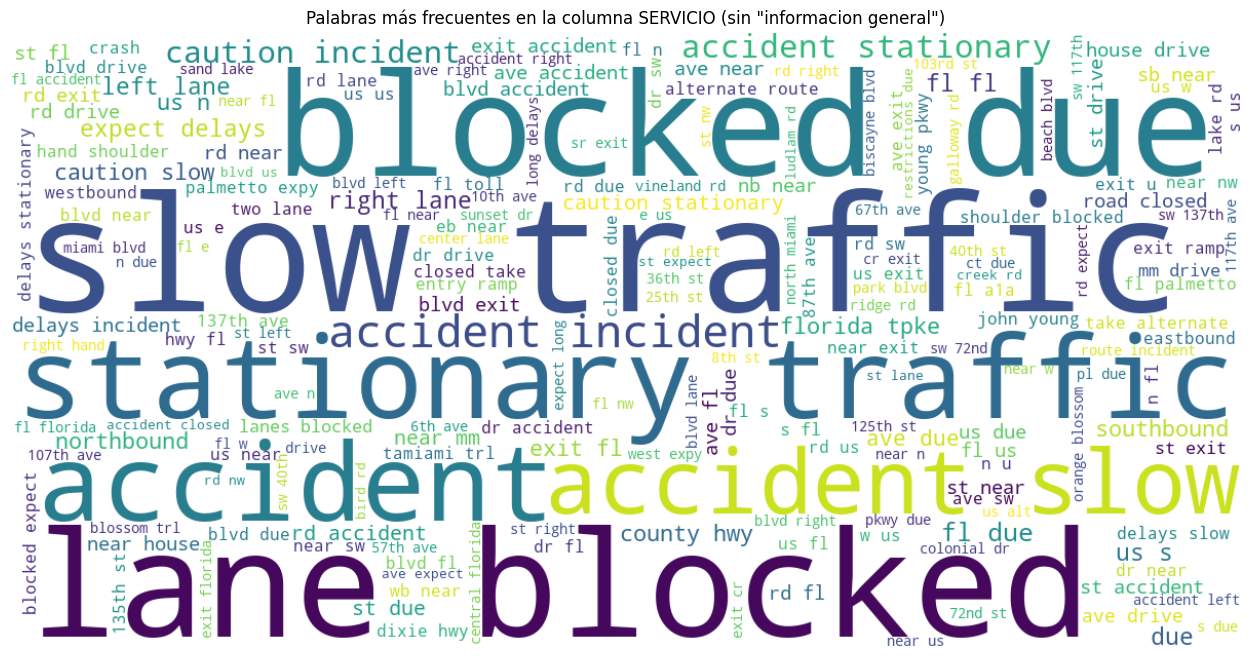

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Excluir "informacion general" de la nube de palabras
text = ' '.join(traffic_accidents_raw['Description'].dropna().str.strip().str.lower().astype(str))

# Crear el WordCloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en la columna Description")')
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

# Escalamos las columnas numéricas para normalizar los datos
# Esto es útil para algoritmos de machine learning que son sensibles a la escala de los datos
scaler = StandardScaler()
traffic_accidents_scaled = traffic_accidents_raw.copy()
traffic_accidents_scaled[number_columns] = scaler.fit_transform(traffic_accidents_raw[number_columns])

traffic_accidents_scaled.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-116062,Source2,2.108004,2016-11-30 15:36:03,2016-11-30 17:09:22,0.287664,-0.585167,0.002624,0.04453,-0.311576,Queueing traffic and two left lane blocked due to accident on I-75 Southbound after Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,E Dr Martin Luther King Jr Blvd,Tampa,Hillsborough,FL,33610,US,US/Eastern,KVDF,2016-11-30 15:35:00,0.501060,0.142181,-0.080083,-0.465317,0.286379,SSW,-0.528869,-0.124662,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-116063,Source2,2.108004,2016-11-30 16:25:35,2016-11-30 17:12:25,0.287664,-0.585167,0.002624,0.04453,-0.311576,Queueing traffic and 2 left lane closed due to accident on I-75 Southbound at Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,E Dr Martin Luther King Jr Blvd,Tampa,Hillsborough,FL,33610,US,US/Eastern,KVDF,2016-11-30 16:35:00,0.501060,0.142181,-0.372206,-0.465317,0.286379,WSW,-0.310466,-0.124662,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-116064,Source2,-0.343335,2016-11-30 16:40:31,2016-11-30 17:10:19,-1.222141,0.769074,0.002624,0.04453,-0.311576,Accident on FL-992 152nd St at Lincoln Blvd.,SW 152nd St,Miami,Miami-Dade,FL,33157-1147,US,US/Eastern,KTMB,2016-11-30 16:53:00,0.452884,0.142181,-0.021659,-0.342782,0.286379,SE,0.146195,-0.124662,Mostly Cloudy,False,False,True,False,False,False,False,False,False,True,False,True,False,Day,Day,Day,Day


In [57]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para evitar modificar el original
df_label_encoded = traffic_accidents_raw.copy()

# Aplicamos Label Encoding solo a las columnas categóricas filtradas
le = LabelEncoder()
for col in categorical_columns:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))

print("Dataset después de aplicar Label Encoding:")
df_label_encoded.head(3)

Dataset después de aplicar Label Encoding:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-116062,Source2,3,2016-11-30 15:36:03,2016-11-30 17:09:22,27.981367,-82.326561,27.40847,-81.32533,0.01,Queueing traffic and two left lane blocked due to accident on I-75 Southbound after Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,31544,525,29,FL,33610,US,US/Eastern,KVDF,2016-11-30 15:35:00,80.6,77.0,70.0,29.94,10.0,15,5.8,0.0,37,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0
1,A-116063,Source2,3,2016-11-30 16:25:35,2016-11-30 17:12:25,27.981367,-82.326561,27.40847,-81.32533,0.01,Queueing traffic and 2 left lane closed due to accident on I-75 Southbound at Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,31544,525,29,FL,33610,US,US/Eastern,KVDF,2016-11-30 16:35:00,80.6,77.0,65.0,29.94,10.0,22,6.9,0.0,34,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0
2,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,27.40847,-81.32533,0.01,Accident on FL-992 152nd St at Lincoln Blvd.,43865,329,44,FL,33157-1147,US,US/Eastern,KTMB,2016-11-30 16:53:00,80.1,77.0,71.0,29.96,10.0,13,9.2,0.0,34,False,False,True,False,False,False,False,False,False,True,False,True,False,0,0,0,0


In [60]:
from sklearn.preprocessing import LabelEncoder

# Copia del DataFrame para encoding
df_encoded = traffic_accidents_raw.copy()

# Usamos las columnas categóricas ya filtradas
label_cols = categorical_columns.columns.tolist()  # categorical_columns es un DataFrame, usamos sus columnas

le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le  # Guardar el encoder si se requiere invertir luego

# FrequencyEncoder para una columna categórica, por ejemplo 'City'
city_freq = df_encoded['City'].value_counts(normalize=True)
df_encoded['City_freq'] = df_encoded['City'].map(city_freq)

print("Dataset después de aplicar Label y Frequency Encoding:")
df_encoded.head(3)

Dataset después de aplicar Label y Frequency Encoding:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,City_freq
0,A-116062,Source2,3,2016-11-30 15:36:03,2016-11-30 17:09:22,27.981367,-82.326561,27.40847,-81.32533,0.01,Queueing traffic and two left lane blocked due to accident on I-75 Southbound after Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,31544,525,29,FL,33610,US,US/Eastern,KVDF,2016-11-30 15:35:00,80.6,77.0,70.0,29.94,10.0,15,5.8,0.0,37,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0.035439
1,A-116063,Source2,3,2016-11-30 16:25:35,2016-11-30 17:12:25,27.981367,-82.326561,27.40847,-81.32533,0.01,Queueing traffic and 2 left lane closed due to accident on I-75 Southbound at Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,31544,525,29,FL,33610,US,US/Eastern,KVDF,2016-11-30 16:35:00,80.6,77.0,65.0,29.94,10.0,22,6.9,0.0,34,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0.035439
2,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,27.40847,-81.32533,0.01,Accident on FL-992 152nd St at Lincoln Blvd.,43865,329,44,FL,33157-1147,US,US/Eastern,KTMB,2016-11-30 16:53:00,80.1,77.0,71.0,29.96,10.0,13,9.2,0.0,34,False,False,True,False,False,False,False,False,False,True,False,True,False,0,0,0,0,0.212228


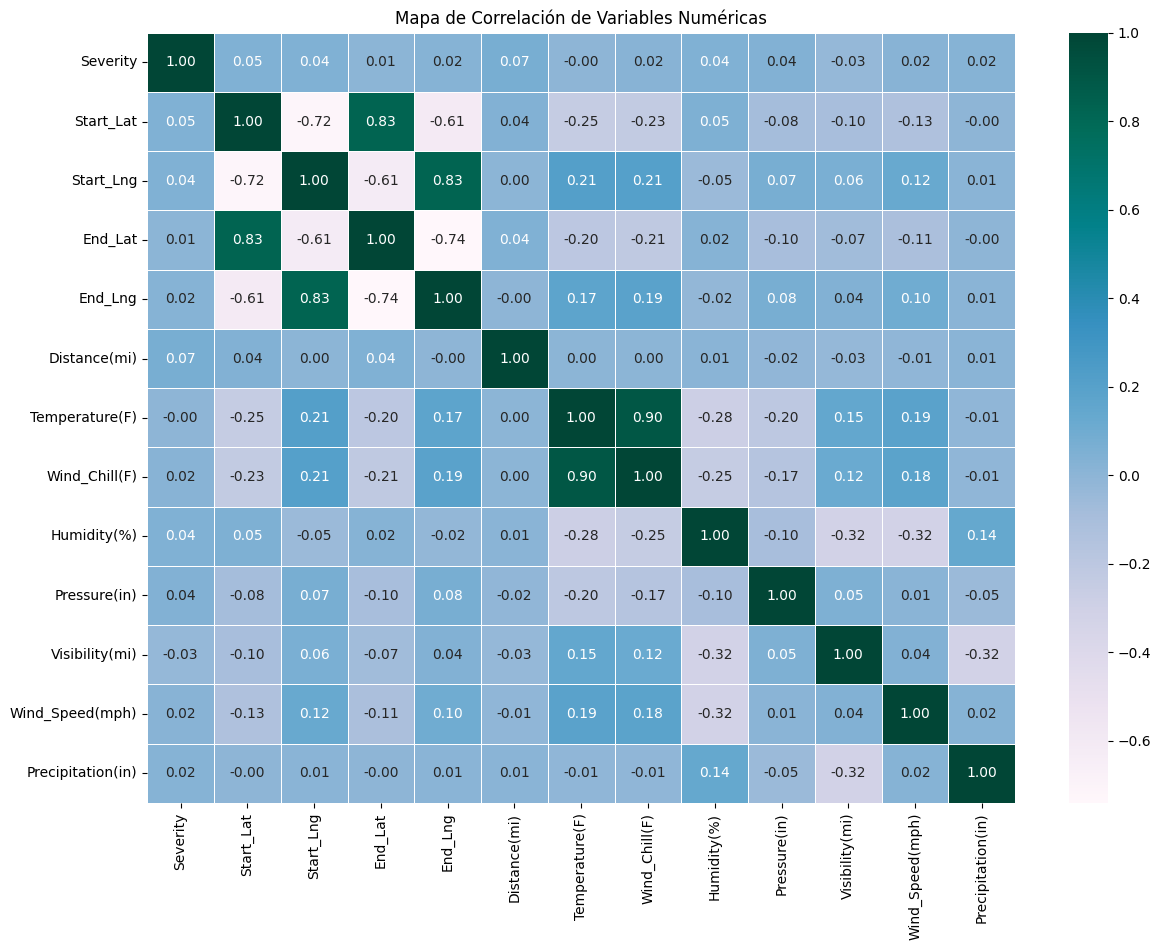

In [63]:
# Mapa de correlación para las variables numéricas
corr_matrix = df_encoded[number_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

### 🛠️ Modelos Predictivos

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Cargar datos
df = df_encoded

# 2. Seleccionar columnas relevantes
cols = ["Severity", "Start_Lat", "Start_Lng", "Temperature(F)", "Humidity(%)", "Visibility(mi)", "Wind_Speed(mph)", "Weather_Condition", "Start_Time"]
df = df[cols].dropna()

# 3. Convertir fechas usando formato flexible para evitar errores de parsing
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format='mixed', errors='coerce')

# Eliminar filas con fechas no convertidas
df = df.dropna(subset=["Start_Time"])

# 4. Crear variable de hora
df["Hour"] = df["Start_Time"].dt.hour

# 5. Codificar Weather_Condition
df = pd.get_dummies(df, columns=["Weather_Condition"], drop_first=True)

# 6. Variable objetivo
df["Target"] = (df["Severity"] >= 2).astype(int)
df = df.drop(columns=["Severity", "Start_Time"])

# 7. X y y
X = df.drop("Target", axis=1)
y = df["Target"]

# 8. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[   232   1915]
 [   144 261767]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.11      0.18      2147
           1       0.99      1.00      1.00    261911

    accuracy                           0.99    264058
   macro avg       0.80      0.55      0.59    264058
weighted avg       0.99      0.99      0.99    264058


ROC AUC: 0.8603096697195429
